In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../summary_data/subsample/subsample_diversity.csv")
df

,Sample,shannon_index_TCR,shannon_index_tool,tool,new_total_reads_tool,est_reads,clonotype_count_tool,absolute_error
0,sample01,1.072675,0.448437,MIXCR,28349,28000,219,0.624237
1,sample01,1.072675,0.547504,IMREP,28349,28000,369,0.525171
2,sample01,1.072675,0.518910,TRUST4,28349,28000,316,0.553765
3,sample01,1.072675,0.389090,MIXCR,13889,13500,31,0.683585
4,sample01,1.072675,0.459795,IMREP,13889,13500,93,0.612880
5,sample01,1.072675,0.461263,TRUST4,13889,13500,109,0.611412
6,sample01,1.072675,0.372418,MIXCR,2739,2600,3,0.700256
7,sample01,1.072675,0.406998,IMREP,2739,2600,13,0.665677
8,sample01,1.072675,0.396686,TRUST4,2739,2600,11,0.675989
9,sample01,1.072675,0.366791,MIXCR,1362,1300,1,0.705884


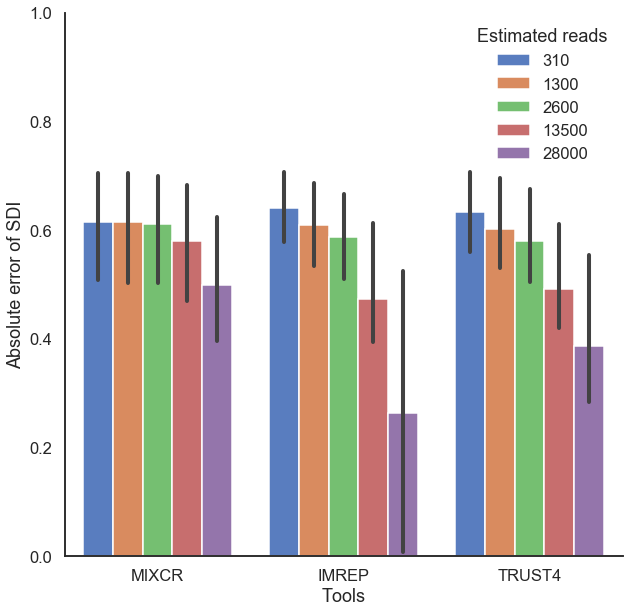

In [3]:
sns.set_style('white')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=df, x="tool", y="absolute_error", hue="est_reads", palette="muted")

ax.set(ylim=(0,1))
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1, 1), frameon=False, title='Estimated reads')

ax.set_xlabel('Tools')
ax.set_ylabel('Absolute error of SDI')
sns.despine()

plt.savefig("../figures/supplementary/figureS5_b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_b.png",bbox_inches="tight")

In [4]:
mean_diversity_combined = df.groupby(["tool","est_reads"])["absolute_error"].mean().reset_index()
mean_diversity_combined = mean_diversity_combined.sort_values('est_reads')
mean_diversity_combined

,tool,est_reads,absolute_error
0,IMREP,310,0.641328
5,MIXCR,310,0.615859
10,TRUST4,310,0.634125
1,IMREP,1300,0.610226
6,MIXCR,1300,0.614136
11,TRUST4,1300,0.601894
2,IMREP,2600,0.587918
7,MIXCR,2600,0.611067
12,TRUST4,2600,0.579390
3,IMREP,13500,0.474227
